In [1]:
import numpy as np
import matplotlib.pyplot as plt

import data_loading
import solver_create_front
import utils
import return_estimation
import portfolio_visualization

In [2]:
companies = data_loading.load_all_companies_from_dir("./data/Bundle3")

The predictions were obtained using direct autoregressive trees. The code is in `create_forecasters.py`. It isn't run here, because the training and inference take a significant amount of time, and the models altogether take up over 4GB of space, making them impossible to send

In [3]:
for company in companies:
    csv_path = f"./saved_forecasts/bundle3/{company.name}.csv"
    company.expected_return = (return_estimation.expected_return_from_csv(csv_path, 400) / company.prices[-1]) - 1

In [6]:
ec_sol = solver_create_front.uniformly_search_threshold_space(companies, 100, 400, calculate_expected_return=False)
ec_arrays = [np.array(x[1]['x']) for x in ec_sol]
ec_points = [(utils.portfolio_expected_return(companies, p)[0], utils.portfolio_risk(companies, p)) for p in ec_arrays]

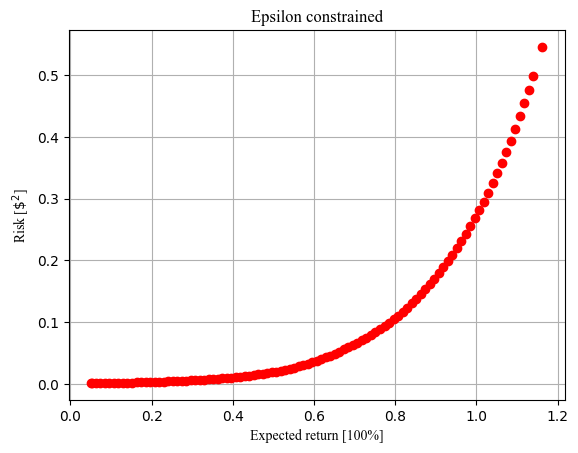

In [7]:
solver_create_front.plot_front(companies, ec_sol, title="Epsilon constrained")

In [9]:
print(f"\tExpected return\t  Risk\t\tRatio\t\tNum companies")
for i, solution in enumerate(ec_sol):
    expected_return = utils.portfolio_expected_return(companies, solution[1]['x'])
    risk = utils.portfolio_risk(companies, solution[1]['x'])
    included_companies = utils.portfolio_num_included_companies(solution[1]['x'], inclusion_threshold=0.01)
    print(f"{i:2}. {np.round(expected_return, 3):16}\t{np.round(risk, 4):8}\t{np.round(expected_return/risk, 3):8}\t{included_companies}")

	Expected return	  Risk		Ratio		Num companies
 0.            0.052	  0.0018	  28.933	12
 1.            0.052	  0.0018	   29.07	12
 2.            0.063	  0.0018	  35.005	12
 3.            0.074	  0.0018	  40.701	12
 4.            0.085	  0.0019	    45.9	12
 5.            0.096	  0.0019	  50.515	12
 6.            0.107	   0.002	  54.486	12
 7.            0.118	   0.002	  57.816	12
 8.            0.129	  0.0021	  60.576	11
 9.            0.141	  0.0022	  62.688	12
10.            0.152	  0.0024	  64.003	12
11.            0.163	  0.0025	  64.732	13
12.            0.174	  0.0027	  64.994	12
13.            0.185	  0.0029	  64.851	12
14.            0.196	  0.0031	  64.262	12
15.            0.207	  0.0033	  63.237	12
16.            0.218	  0.0035	  61.881	12
17.            0.229	  0.0038	  60.289	12
18.            0.241	  0.0041	  58.539	12
19.            0.252	  0.0044	   56.74	12
20.            0.263	  0.0048	  54.978	13
21.            0.274	  0.0051	  53.264	13
22.            0.285	  0.0055	

In [10]:
chosen_idx =  12
chosen_min_ret, chosen_solution = ec_sol[chosen_idx]

In [11]:
expected_return = utils.portfolio_expected_return(companies, chosen_solution['x'])
risk = utils.portfolio_risk(companies, chosen_solution['x'])
included_companies = utils.portfolio_num_included_companies(chosen_solution['x'])
print(f"{chosen_idx:2}. {np.round(expected_return, 3):16}\t{np.round(risk, 4):8}\t{np.round(expected_return/risk, 3):8}\t{included_companies}")

12.            0.174	  0.0027	  64.994	5


In [12]:
ordered_weights = utils.weights_in_valid_order(companies, chosen_solution['x'])
# print("Min expected return:", chosen_min_ret)
for company_name, weight in zip(utils.COMPANY_ORDER, ordered_weights):
    print(f"{company_name:19}", np.round(weight, 2))

SuperFuture         0.0
Apples              0.0
WorldNow            0.0
Electronics123      0.02
Photons             0.14
SpaceNow            0.08
PearPear            0.01
PositiveCorrelation 0.14
BetterTechnology    0.0
ABCDE               0.02
EnviroLike          0.15
Moneymakers         0.0
Fuel4               0.08
MarsProject         0.0
CPU-XYZ             0.13
RoboticsX           0.11
Lasers              0.08
WaterForce          0.03
SafeAndCare         0.02
BetterTomorrow      0.0


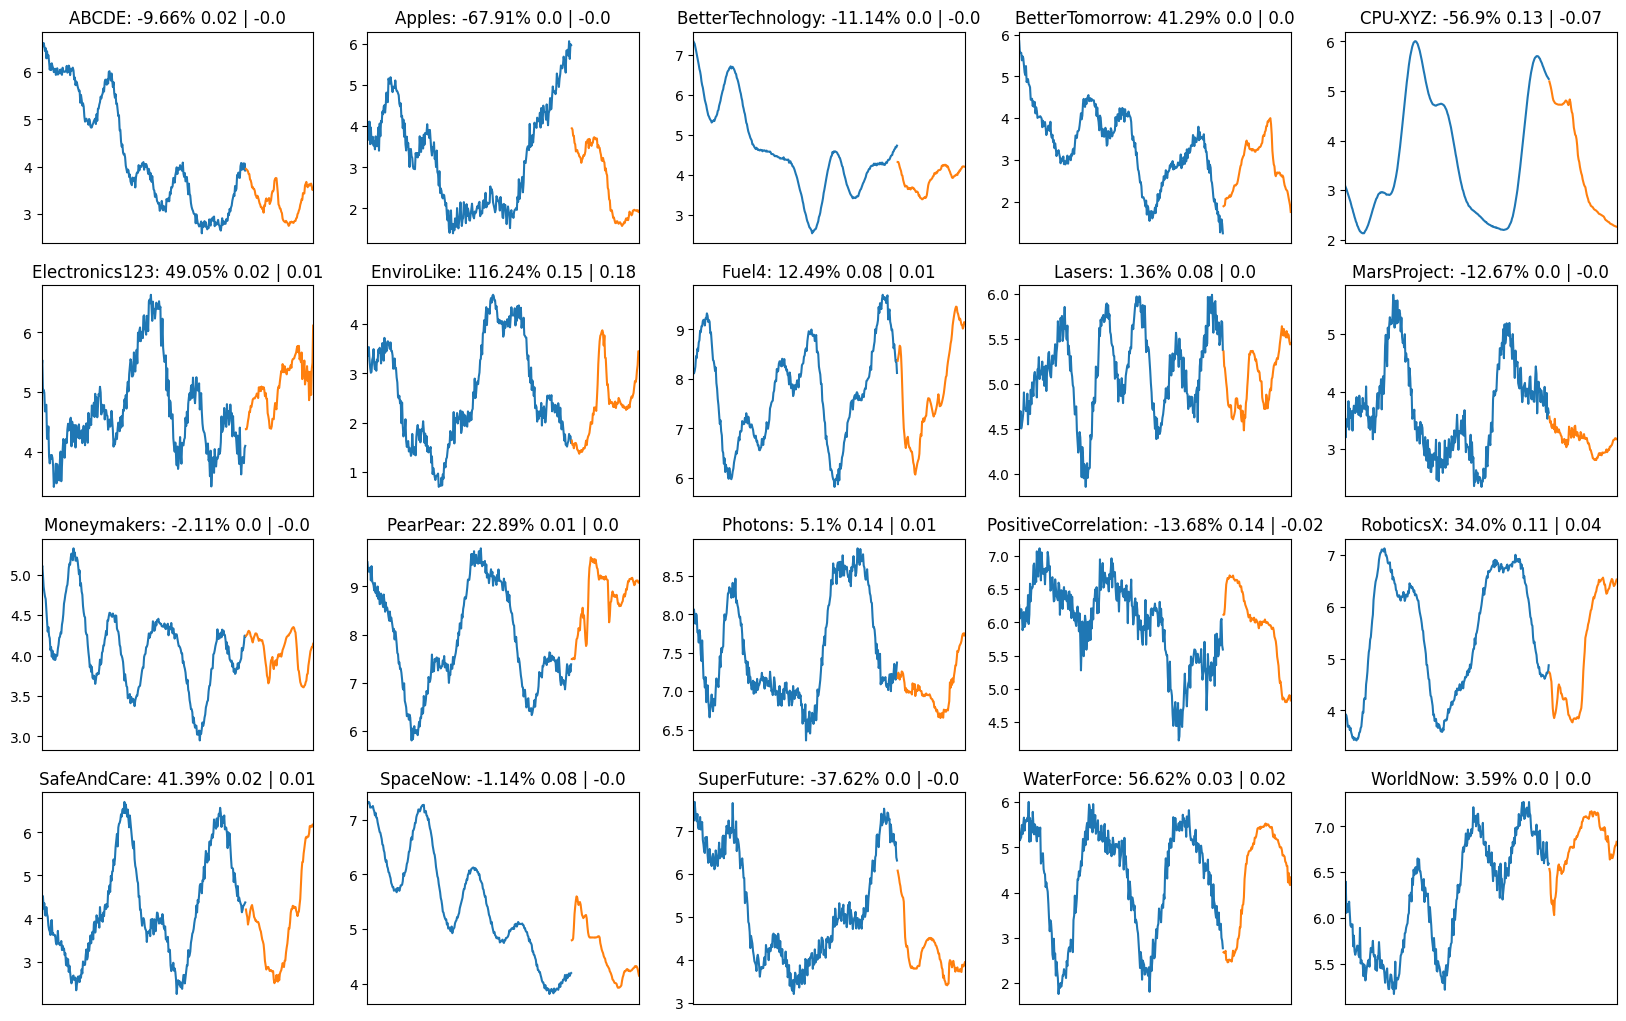

In [13]:
portfolio_visualization.vis_portfolio_from_csv_subplots(companies, 400, chosen_solution['x'], "./saved_forecasts/bundle3/")

I don't like some of the aspects of this solution, but after searching through many options, this seemed like the easiest to fix to match my preferences. The notes I made for myself, before running any models were:

Maybe buy
- EnviroLike -  cheap, near its all-time low, can bounce
- SafeAndCare - the next timestamp should line up with a higher value, given how the previous cycles have proceeded

DON'T BUY:
- ABCDE - consistently decreasing, still with room to fall (now it's less dramatic though)
- Apples - at an all time high
- CPU-XYZ - after its peak, likely to drop
- SpaceNow - consistently decreasing, still expensive
- SuperFuture - at peak and dropping

In [14]:
for i, c in enumerate(companies):
    print(i, c.name, chosen_solution['x'][i])

0 ABCDE 0.016978010688433152
1 Apples 1.985972670973902e-08
2 BetterTechnology 2.0250345434921766e-09
3 BetterTomorrow 1.9490175418408857e-09
4 CPU-XYZ 0.12607175433313597
5 Electronics123 0.017941024660809643
6 EnviroLike 0.15454083608970803
7 Fuel4 0.08151827642009114
8 Lasers 0.08042080966452857
9 MarsProject 0.001964901946422363
10 Moneymakers 1.6020200066827943e-08
11 PearPear 0.007653130341080149
12 Photons 0.13785273844127488
13 PositiveCorrelation 0.1427813103141184
14 RoboticsX 0.11116751842895577
15 SafeAndCare 0.015733541519805928
16 SpaceNow 0.07868548109953713
17 SuperFuture 7.086573777893369e-10
18 WaterForce 0.02669061410268153
19 WorldNow 1.1386781177758673e-08


Here I make the changes to adjust the portfolio to be more similar to my preferences. I didn't make them too drastic, to not go against the spirit of the task (and to feel less bad if they turn out to be bad choices).

In [15]:
modified_solution = np.array(chosen_solution['x'][:]).reshape(20,)
# transfer from CPU-XYZ to EnviroLike
modified_solution[4] -= 0.05
modified_solution[6] += 0.05
# transfer from CPU-XYZ to SafeAndCare
modified_solution[4] -= 0.05
modified_solution[15] += 0.05
modified_exp_ret = utils.portfolio_expected_return(companies, modified_solution)
modified_risk = utils.portfolio_risk(companies, modified_solution)
print(modified_exp_ret)
print(modified_risk)
print(np.sum(modified_solution))

0.30959468885634933
0.01527630849133638
1.0


## Presenting the final solution

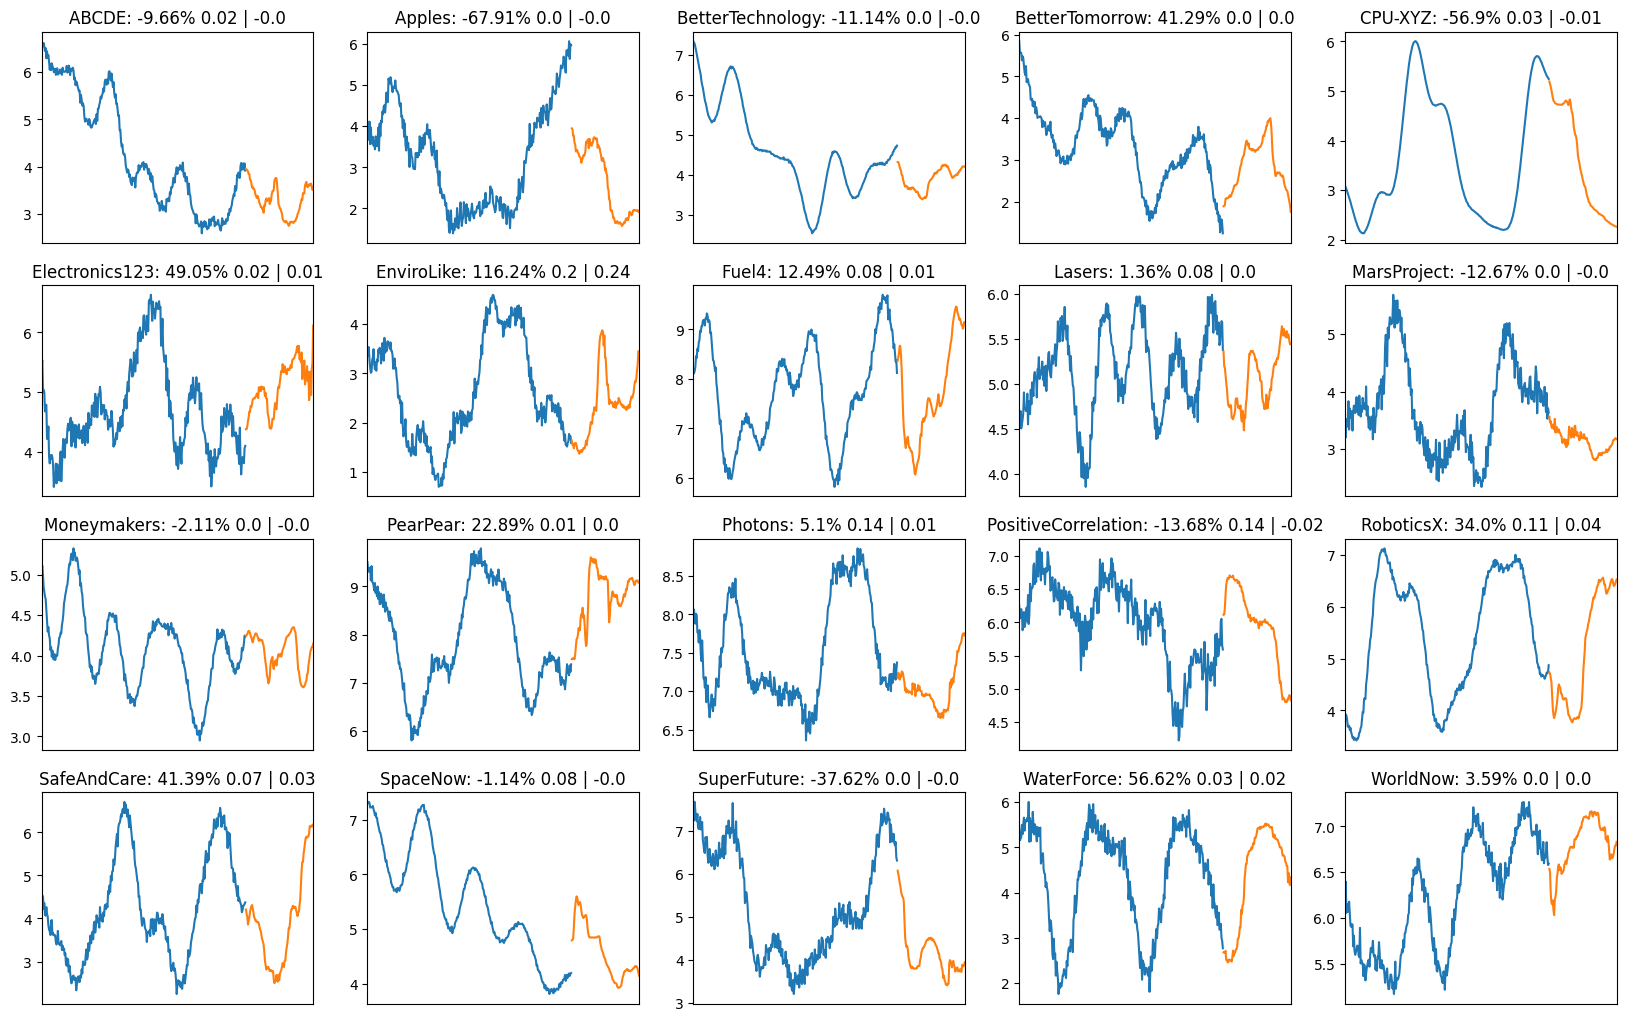

In [18]:
portfolio_visualization.vis_portfolio_from_csv_subplots(companies, 400, modified_solution, "./saved_forecasts/bundle3/", export_pdf=True, pdf_title="portfolio3.pdf")

In [19]:
ordered_modified_weights = utils.weights_in_valid_order(companies, modified_solution)
for company_name, weight in zip(utils.COMPANY_ORDER, ordered_modified_weights):
    print(f"{company_name:19}", np.round(weight, 5))

SuperFuture         0.0
Apples              0.0
WorldNow            0.0
Electronics123      0.01794
Photons             0.13785
SpaceNow            0.07869
PearPear            0.00765
PositiveCorrelation 0.14278
BetterTechnology    0.0
ABCDE               0.01698
EnviroLike          0.20454
Moneymakers         0.0
Fuel4               0.08152
MarsProject         0.00196
CPU-XYZ             0.02607
RoboticsX           0.11117
Lasers              0.08042
WaterForce          0.02669
SafeAndCare         0.06573
BetterTomorrow      0.0


Data for submission

In [20]:
print(modified_exp_ret, end=" ")
print(modified_risk, end = " ")
for weight in ordered_modified_weights:
    print(weight,  end=" ")

0.30959468885634933 0.01527630849133638 7.086573777893369e-10 1.985972670973902e-08 1.1386781177758673e-08 0.017941024660809643 0.13785273844127488 0.07868548109953713 0.007653130341080149 0.1427813103141184 2.0250345434921766e-09 0.016978010688433152 0.20454083608970802 1.6020200066827943e-08 0.08151827642009114 0.001964901946422363 0.026071754333135966 0.11116751842895577 0.08042080966452857 0.02669061410268153 0.06573354151980593 1.9490175418408857e-09 